In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set(style="whitegrid")

In [2]:
def save_to_pdf(filename, ax):
    fig = ax.get_figure()
    fig.savefig(filename, bbox_inches='tight')

In [4]:
df_guardian = pd.read_csv('../data/replies/guardian.csv')
df_daily = pd.read_csv('../data/replies/daily-mail.csv')

In [5]:
df_guardian.index = df_guardian['timestamp']
df_daily.index = df_daily['timestamp']

In [6]:
df_guardian['timestamp'] = pd.to_datetime(df_guardian['timestamp'])
df_daily['timestamp'] = pd.to_datetime(df_daily['timestamp'])

In [7]:
df_guardian['date'] = pd.to_datetime(df_guardian["timestamp"].dt.strftime('%Y-%m'))
df_daily['date'] = pd.to_datetime(df_daily["timestamp"].dt.strftime('%Y-%m'))

In [8]:
df_merge = pd.merge(df_guardian, df_daily, on='date', how='outer')

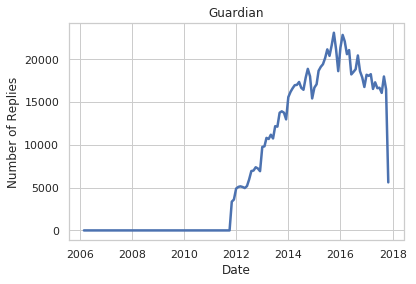

In [15]:
ax = sns.lineplot(x = df_guardian['date'], y=df_guardian['reply_count'],linewidth=2.5, ci=None)
ax.set(xlabel='Date', ylabel='Number of Replies', title='Guardian')
save_to_pdf('./plots/guardian_replies_count.pdf', ax)

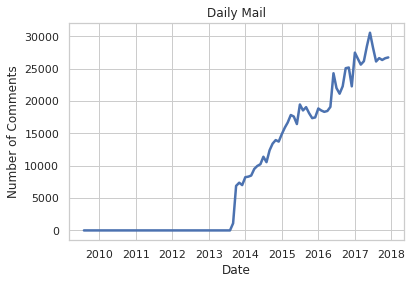

In [16]:
ax = sns.lineplot(x = df_daily['date'], y=df_daily['reply_count'],linewidth=2.5, ci=None)
ax.set(xlabel='Date', ylabel='Number of Comments', title='Daily Mail')
save_to_pdf('./plots/dailymail_reply_count.pdf', ax)